In [12]:
from google.colab import drive
# 挂载谷歌云盘
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile
import os

# zip文件的路径
zip_file_path = '/content/drive/MyDrive/patentsview/assignee_disambiguated.zip'
# 解压目标目录
target_directory = '/content/drive/MyDrive/patentsview'

# 检查zip文件是否存在
if not os.path.exists(zip_file_path):
    print("指定的zip文件不存在，请检查路径。")
else:
    # 检查目标目录是否存在，不存在则创建
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)
        print(f"目标目录{target_directory}不存在，已创建。")

    # 开始解压
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(target_directory)
        print("文件解压成功。")
    except Exception as e:
        print(f"解压过程中出现错误：{e}")


文件解压成功。


1. 操作g_assignee

In [7]:
import pandas as pd

# 加载CSV文件
file_path = '/content/drive/MyDrive/patentsview/g_assignee_disambiguated.csv'
df = pd.read_csv(file_path)
df

,patent_id,assignee_sequence,assignee_id,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,assignee_type,location_id
0,4488683,0,dbc3c0e0-4e68-4959-ba5b-74c7910e2247,NaN,NaN,Metal Works Ramat David,3.0,50dc5d46-16c8-11ed-9b5f-1234bde3cd05
1,5856666,0,529d06ec-c25c-405b-a2e2-366ee31e4a6d,NaN,NaN,U.S. Philips Corporation,2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05
2,5204210,0,65a958d3-c7ac-424c-9f8d-7b9767b0a28f,NaN,NaN,Xerox Corporation,2.0,0cd1998f-16c8-11ed-9b5f-1234bde3cd05
3,5302149,1,5d2d4857-9df8-4c18-919d-1311d3a1cb85,NaN,NaN,Commonwealth Scientific and Industrial Researc...,7.0,4d36742f-16c8-11ed-9b5f-1234bde3cd05
4,D397841,0,54e9cc17-bcbd-43c8-9ee1-54063f734f3c,NaN,NaN,adidas AG,3.0,280c9de4-16c8-11ed-9b5f-1234bde3cd05
...,...,...,...,...,...,...,...,...
8024355,11271126,0,f8ade688-6d73-46d6-a1ee-7c3964efac0f,NaN,NaN,"BEIJING APOLLO DING RONG SOLAR TECHNOLOGY CO.,...",3.0,3b444e27-16c8-11ed-9b5f-1234bde3cd05
8024356,8328445,0,42d67da4-52d5-4159-a29c-203a57b45873,NaN,NaN,NATURA COSMÉTICOS S.A.,3.0,9ec634a9-16c8-11ed-9b5f-1234bde3cd05
8024357,5970411,0,ad6e9bfa-4b14-4190-9ed5-0392823a888a,NaN,NaN,Nortel Networks Limited,3.0,d0e3c8bf-16c7-11ed-9b5f-1234bde3cd05
8024358,9760360,0,b63a5904-38e4-4aae-a55a-d88d38aa4f72,NaN,NaN,"Microsoft Technology Licensing, LLC",2.0,816d1200-16c8-11ed-9b5f-1234bde3cd05


In [8]:
# 选择并保留指定的两列
df = df[['patent_id', 'disambig_assignee_organization']]
df

,patent_id,disambig_assignee_organization
0,4488683,Metal Works Ramat David
1,5856666,U.S. Philips Corporation
2,5204210,Xerox Corporation
3,5302149,Commonwealth Scientific and Industrial Researc...
4,D397841,adidas AG
...,...,...
8024355,11271126,"BEIJING APOLLO DING RONG SOLAR TECHNOLOGY CO.,..."
8024356,8328445,NATURA COSMÉTICOS S.A.
8024357,5970411,Nortel Networks Limited
8024358,9760360,"Microsoft Technology Licensing, LLC"


In [9]:
# 对一个字段操作前的基本步骤：
#1. 删除rf_id列中的缺失值
df.dropna(subset=['patent_id'], inplace=True)
# 2.转换列为字符串，并去除可能的前后空格
df['patent_id'] = df['patent_id'].astype(str).str.strip()
#3.# 删除空字符串的样本
df = df[df['patent_id'] != '']

# 1. 替换缺失值为空字符串
df['disambig_assignee_organization'] = df['disambig_assignee_organization'].fillna('')
# 2. 转换列为字符串类型
df['disambig_assignee_organization'] = df['disambig_assignee_organization'].astype(str)
# 3. 删除字符串首尾空格
df['disambig_assignee_organization'] = df['disambig_assignee_organization'].str.strip()
df = df[df['disambig_assignee_organization'] != '']
df

<ipython-input-9-dc4b032c93f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['patent_id'], inplace=True)
<ipython-input-9-dc4b032c93f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['patent_id'] = df['patent_id'].astype(str).str.strip()


,patent_id,disambig_assignee_organization
0,4488683,Metal Works Ramat David
1,5856666,U.S. Philips Corporation
2,5204210,Xerox Corporation
3,5302149,Commonwealth Scientific and Industrial Researc...
4,D397841,adidas AG
...,...,...
8024355,11271126,"BEIJING APOLLO DING RONG SOLAR TECHNOLOGY CO.,..."
8024356,8328445,NATURA COSMÉTICOS S.A.
8024357,5970411,Nortel Networks Limited
8024358,9760360,"Microsoft Technology Licensing, LLC"


接下来，标准化公司名称，先标准化再聚合，再和standard_ee_name对比

In [13]:
df = df.rename(columns={'disambig_assignee_organization': 'assignee_name'})

In [14]:
# 计算 df 中 ee_name 列的缺失值数量
missing_values_count = df['assignee_name'].isna().sum()
# 打印结果
print(f"Number of missing values in 'ee_name': {missing_values_count}")

Number of missing values in 'ee_name': 0


In [15]:
# 计算 df 中 ee_name 列空字符串的数量
empty_string_count = (df['assignee_name'] == '').sum()
# 打印结果
print(f"Number of empty strings in 'ee_name': {empty_string_count}")

Number of empty strings in 'ee_name': 0


In [16]:
# 创建 standard_name 变量，将其值设置为 ee_name 变量的值
df['standard_name'] = df['assignee_name']

In [17]:
import pandas as pd

# 假设df已经被加载到您的环境中

# 步骤1: 如果standard_name开头和结尾存在空格，则删除
df['standard_name'] = df['standard_name'].str.strip()

# 步骤2: 为standard_name的开头和结尾增加一个空格
df['standard_name'] = ' ' + df['standard_name'] + ' '

df[['standard_name', 'assignee_name']].head()


,standard_name,assignee_name
0,Metal Works Ramat David,Metal Works Ramat David
1,U.S. Philips Corporation,U.S. Philips Corporation
2,Xerox Corporation,Xerox Corporation
3,Commonwealth Scientific and Industrial Resear...,Commonwealth Scientific and Industrial Researc...
4,adidas AG,adidas AG


In [18]:
# 使用str.replace()方法替换第一次出现的"-CONN."为""
df['standard_name'] = df['standard_name'].str.replace("-CONN.", "", n=1, regex=False)

In [19]:
# 使用str.replace()方法替换所有的";"为" ; "
df['standard_name'] = df['standard_name'].str.replace(";", " ; ", regex=False)

In [20]:
# 将 'standard_name' 列的所有值转换为大写
df['standard_name'] = df['standard_name'].str.upper()
# 检查结果
df[['standard_name', 'assignee_name']].head()

,standard_name,assignee_name
0,METAL WORKS RAMAT DAVID,Metal Works Ramat David
1,U.S. PHILIPS CORPORATION,U.S. Philips Corporation
2,XEROX CORPORATION,Xerox Corporation
3,COMMONWEALTH SCIENTIFIC AND INDUSTRIAL RESEAR...,Commonwealth Scientific and Industrial Researc...
4,ADIDAS AG,adidas AG


In [21]:
# 使用apply函数遍历每个元素，对'standard_name'列中满足条件的字符串进行修改
df['standard_name'] = df['standard_name'].apply(lambda x: x[:-5] if x.endswith('(THE)') else x)
# 使用apply函数遍历每个元素，对'standard_name'列中满足条件的字符串进行修改
df['standard_name'] = df['standard_name'].apply(lambda x: x[4:] if x.startswith('THE ') else x)

In [22]:
# 替换standard_name列中的所有单引号(')为无（即删除它们）
df['standard_name'] = df['standard_name'].str.replace("'", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("^", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("<", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(".", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("`", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("_", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(">", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("''", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("!", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("+", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("?", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("(", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("{", "", regex=False)

df['standard_name'] = df['standard_name'].str.replace("\\", "", regex=False)

df['standard_name'] = df['standard_name'].str.replace(")", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("$", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("}", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("|", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(",", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("%", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("[", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("*", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("]", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("@", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(":", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("~", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("#", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(" AND ", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace(" & ", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace(";", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("/", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace("-", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace("  ", " ", regex=False)

In [23]:
# 检查结果
df[['standard_name', 'assignee_name']].head()

,standard_name,assignee_name
0,METAL WORKS RAMAT DAVID,Metal Works Ramat David
1,US PHILIPS CORPORATION,U.S. Philips Corporation
2,XEROX CORPORATION,Xerox Corporation
3,COMMONWEALTH SCIENTIFIC INDUSTRIAL RESEARCH O...,Commonwealth Scientific and Industrial Researc...
4,ADIDAS AG,adidas AG


In [24]:
# 检查第二个样本的standard_name的值是否以空格开头
second_sample_starts_with_space = df['standard_name'].iloc[2].startswith(' ')

print(f"第二个样本的standard_name的值是否以空格开头: {second_sample_starts_with_space}")


第二个样本的standard_name的值是否以空格开头: True


In [25]:
import pandas as pd

# 检查'standard_name'列中是否存在字符串" RECH & DEV "
contains_string = df['standard_name'].str.contains(" RES & DEV ", na=False).any()

if contains_string:
    print("存在字符串' RES & DEV '")
else:
    print("不存在字符串' RES & DEV '")


不存在字符串' RES & DEV '


In [26]:
import pandas as pd

# 检查'standard_name'列中是否存在字符串" RECH & DEV "
contains_string = df['standard_name'].str.contains(" RECH & DEV ", na=False).any()

if contains_string:
    print("存在字符串' RECH & DEV '")
else:
    print("不存在字符串' RECH & DEV '")


不存在字符串' RECH & DEV '


In [27]:
df[['standard_name', 'assignee_name']].head()


,standard_name,assignee_name
0,METAL WORKS RAMAT DAVID,Metal Works Ramat David
1,US PHILIPS CORPORATION,U.S. Philips Corporation
2,XEROX CORPORATION,Xerox Corporation
3,COMMONWEALTH SCIENTIFIC INDUSTRIAL RESEARCH O...,Commonwealth Scientific and Industrial Researc...
4,ADIDAS AG,adidas AG


In [28]:
# 检查第二个样本的standard_name的值是否以空格开头
second_sample_starts_with_space = df['standard_name'].iloc[1].startswith(' ')

print(f"第二个样本的standard_name的值是否以空格开头: {second_sample_starts_with_space}")


第二个样本的standard_name的值是否以空格开头: True


In [29]:
pip install tqdm

In [30]:
from tqdm import tqdm
import pandas as pd

# 加载替换规则的Excel文件
rules_path = '/content/drive/MyDrive/addition_list/standard_name_list.xlsx'
rules_df = pd.read_excel(rules_path, sheet_name='Sheet1')

# 假设df是您的DataFrame

# 使用tqdm库遍历所有替换规则，并逐一应用
for index, row in tqdm(rules_df.iterrows(), total=rules_df.shape[0]):
    initial_text = row['initial']  # 被替换的字符串
    replace_text = row['replace']  # 替换结果的字符串
    # 应用替换规则
    df['standard_name'] = df['standard_name'].str.replace(initial_text, replace_text, n=1, regex=False)


100%|██████████| 832/832 [58:28<00:00,  4.22s/it]


In [31]:
df['standard_name'] = df['standard_name'].str.replace("  ", " ", regex=False)

In [32]:
# 使用正则表达式替换所有的" THE "为" "
df['standard_name'] = df['standard_name'].str.replace(" THE ", " ", regex=False)

In [33]:
df['standard_name'] = df['standard_name'].str.replace("  ", " ", regex=False)

In [35]:
import pandas as pd

def process_standard_name(row):
    name = row['standard_name'].replace('"', '')  # 删除双引号
    words = name.split()  # 分割名字为单词列表
    new_name = ""  # 初始化处理后的新名字字符串

    i = 0
    while i < len(words):
        word = words[i]
        # 如果当前单词长度不是1，或者当前单词是单字符但下一个单词不是单字符
        if len(word) != 1 or (i + 1 < len(words) and len(words[i + 1]) != 1):
            new_name += word + " "  # 向新名字中添加当前单词和一个空格
        else:
            # 如果当前单词和下一个单词都是单字符，则合并它们，不添加额外空格
            new_name += word  # 只添加当前单词，不添加空格
        i += 1

    # 返回处理后的名字，这里没有去除首尾空格
    return new_name

# 应用函数处理每一行的 standard_name
df['processed_standard_name'] = df.apply(process_standard_name, axis=1)

df[['standard_name', 'processed_standard_name']]


,standard_name,processed_standard_name
0,METAL WORKS RAMAT DAVID,METAL WORKS RAMAT DAVID
1,US PHILIPS CORP,US PHILIPS CORP
2,XEROX CORP,XEROX CORP
3,COMMONWEALTH SCI IND RES ORG,COMMONWEALTH SCI IND RES ORG
4,ADIDAS AG,ADIDAS AG
...,...,...
8024355,BEIJING APOLLO DING RONG SOLAR TECH CO LTD,BEIJING APOLLO DING RONG SOLAR TECH CO LTD
8024356,NATURA COSMÉTICOS SA,NATURA COSMÉTICOS SA
8024357,NORTEL NETWORKS LTD,NORTEL NETWORKS LTD
8024358,MICROSOFT TECH LICENSING LLC,MICROSOFT TECH LICENSING LLC


In [36]:
df.rename(columns={'processed_standard_name': 'patentsviewAssignee_StandardName'}, inplace=True)

In [37]:
# 2. 转换列为字符串类型
df['patentsviewAssignee_StandardName'] = df['patentsviewAssignee_StandardName'].astype(str)
# 3. 删除字符串首尾空格
df['patentsviewAssignee_StandardName'] = df['patentsviewAssignee_StandardName'].str.strip()
df = df[df['patentsviewAssignee_StandardName'] != '']
df

,patent_id,assignee_name,standard_name,patentsviewAssignee_StandardName
0,4488683,Metal Works Ramat David,METAL WORKS RAMAT DAVID,METAL WORKS RAMAT DAVID
1,5856666,U.S. Philips Corporation,US PHILIPS CORP,US PHILIPS CORP
2,5204210,Xerox Corporation,XEROX CORP,XEROX CORP
3,5302149,Commonwealth Scientific and Industrial Researc...,COMMONWEALTH SCI IND RES ORG,COMMONWEALTH SCI IND RES ORG
4,D397841,adidas AG,ADIDAS AG,ADIDAS AG
...,...,...,...,...
8024355,11271126,"BEIJING APOLLO DING RONG SOLAR TECHNOLOGY CO.,...",BEIJING APOLLO DING RONG SOLAR TECH CO LTD,BEIJING APOLLO DING RONG SOLAR TECH CO LTD
8024356,8328445,NATURA COSMÉTICOS S.A.,NATURA COSMÉTICOS SA,NATURA COSMÉTICOS SA
8024357,5970411,Nortel Networks Limited,NORTEL NETWORKS LTD,NORTEL NETWORKS LTD
8024358,9760360,"Microsoft Technology Licensing, LLC",MICROSOFT TECH LICENSING LLC,MICROSOFT TECH LICENSING LLC


In [38]:
# 分组并聚合，使用unique()直接获取去重的结果，然后使用join将数组转换为字符串
g_assignee_group = df.groupby('patent_id')['patentsviewAssignee_StandardName'].agg(
    lambda x: '; '.join(x.unique())
).reset_index()

# 2. 重命名聚合后的列，以便清晰表示它是汇总信息
g_assignee_group = g_assignee_group.rename(columns={'patentsviewAssignee_StandardName': 'g_StandardAssignee_group'})

In [39]:
is_patent_id_unique = g_assignee_group['patent_id'].is_unique
print(f"patent_id列中的值是否唯一: {is_patent_id_unique}")
# 计算唯一patent_id的数量
unique_patent_id_count = g_assignee_group['patent_id'].nunique()
# 找出重复的patent_id数量
duplicate_patent_id_count = g_assignee_group['patent_id'].value_counts().loc[lambda x: x > 1].sum()
print(f"唯一的patent_id数量: {unique_patent_id_count}")
print(f"重复的patent_id数量: {duplicate_patent_id_count}")

patent_id列中的值是否唯一: True
唯一的patent_id数量: 7683453
重复的patent_id数量: 0


In [40]:
# 如果需要，保存拼接后的表到新的CSV文件
g_assignee_group.to_csv('/content/drive/MyDrive/addition_list/unique_g_StandardAssignee.csv', index=False)

2.合并assignee信息到PAD,比较assignee和ee_name

In [ ]:
from google.colab import drive
# 挂载谷歌云盘
drive.mount('/content/drive')

In [41]:
import pandas as pd

# 定义文件路径
file_path = '/content/drive/MyDrive/addition_list/unique_g_StandardAssignee.csv'

# 加载CSV文件
df1 = pd.read_csv(file_path)

# 重命名列：将 'pgpub_id' 重命名为 'pgpub_doc_num'
df1.rename(columns={'patent_id': 'grant_doc_num'}, inplace=True)


<ipython-input-41-bcc76aaab061>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path)


In [43]:
df1

,grant_doc_num,g_StandardAssignee_group
0,10000000,RAYTHEON CO
1,10000001,LS MTRON LTD
2,10000002,KOLON IND INC
3,10000003,KAUTEX TEXTRON GMBH & CO KG
4,10000004,ZUBEX IND SA DE CV
...,...,...
7683448,T998008,INT BUSINESS MACHINES CORP
7683449,T998010,CONTINENTAL OIL CO
7683450,T998012,US SEC OF AGRIC
7683451,T998013,US SEC OF AGRIC


In [42]:
# 检查缺失值
missing_values_count = df1['grant_doc_num'].isna().sum()
print("Number of missing values in 'grant_doc_num':", missing_values_count)
# 检查空字符串
empty_strings_count = (df1['grant_doc_num'] == '').sum()
print("Number of empty strings in 'grant_doc_num':", empty_strings_count)

Number of missing values in 'grant_doc_num': 0
Number of empty strings in 'grant_doc_num': 0


In [44]:
# 2.转换列为字符串，并去除可能的前后空格
df1['grant_doc_num'] = df1['grant_doc_num'].astype(str).str.strip()
print(len(df1))

7683453


In [45]:
import pandas as pd

# 定义文件路径
file_path = '/content/drive/MyDrive/reassignment/reassignment_eeFirm_inventor_invorscore.csv'

# 使用read_csv加载指定的列
merged_df = pd.read_csv(file_path)

# 现在df包含了数据集的一个子集，你可以继续你的计算
merged_df.head()
print(len(merged_df))

<ipython-input-45-2a1bb2a1fea6>:7: DtypeWarning: Columns (6,18,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv(file_path)


1644387


In [46]:
# 检查缺失值
missing_values_count = merged_df['grant_doc_num'].isna().sum()
print("Number of missing values in 'grant_doc_num':", missing_values_count)
# 检查空字符串
empty_strings_count = (merged_df['grant_doc_num'] == '').sum()
print("Number of empty strings in 'grant_doc_num':", empty_strings_count)

Number of missing values in 'grant_doc_num': 0
Number of empty strings in 'grant_doc_num': 0


In [47]:
# 2.转换列为字符串，并去除可能的前后空格
merged_df['grant_doc_num'] = merged_df['grant_doc_num'].astype(str).str.strip()
print(len(merged_df))

1644387


In [48]:
import pandas as pd

# 假设 merged_df, df1, 和 df2 已经在你的环境中存在
# 确保你已经正确设置了合并键在每个DataFrame中的列名

# 第一步：以 grant_doc_num 为键将 df1 合并到 merged_df
merged_df = pd.merge(merged_df, df1, on='grant_doc_num', how='left')

# 显示合并后的DataFrame的头部，以验证合并是否成功
merged_df.head()


,rf_id,file_id,cname,caddress_1,caddress_2,caddress_3,caddress_4,reel_no,frame_no,convey_text,...,asstype_institute_ee,uspto_StandardName,uspto_StemName,index_eeFirm,inventor_name,standard_inventor_name,standard_or_name,max_similarity_invor,max_inventor,g_StandardAssignee_group
0,38370429,1.0,"LOWE, KING, PRICE & BECKER",2001 JEFF. DAVIS HWY.,"ARLINGTON, VA 22202",NaN,NaN,3837.0,429.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,0,PROCESS EQUIP BUILDERS INC A CORP OF KY,PROCESS EQUIP BUILDERS A OF,0,"Ladt, Carroll H.",LADT CARROLL H,LADT CARROLL H,1.000000,LADT CARROLL H,PEBCO INC
1,38670514,1.0,LAWRENCE ROSEN,260 MADISON AVE.,"NEW YORK, NY 10016",NaN,NaN,3867.0,514.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,0,ROCKWOOL INT AS,ROCKWOOL INT AS,1,"Jensen, Leif Moeller",JENSEN LEIF MOELLER,JENSEN LEIF,0.816667,JENSEN LEIF MOELLER,ROCKWOOL INT AS
2,38670514,1.0,LAWRENCE ROSEN,260 MADISON AVE.,"NEW YORK, NY 10016",NaN,NaN,3867.0,514.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,0,ROCKWOOL INT AS,ROCKWOOL INT AS,2,"Jensen, Leif Moeller",JENSEN LEIF MOELLER,JENSEN LEIF,0.816667,JENSEN LEIF MOELLER,ROCKWOOL INT AS
3,38790584,1.0,HARRY M. WEISS,4204 NORTH BROWN,"SCOTTSDALE, AZ 85251",NaN,NaN,3879.0,584.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,0,BIOMEDICAL ENG INC A CORP OF AZ,BIOMEDICAL ENG A OF AZ,3,"Dorson, Jr., William J.; Pizziconi, Vincent B.",DORSON JR WILLIAM J; PIZZICONI VINCENT B,PIZZICONI VINCENT B,1.000000,PIZZICONI VINCENT B,BIOMEDICAL LABS
4,38840232,1.0,MAURICE E. GAUTHIER,225 FRANKLIN ST.,"BOSTON, MASS. 02110",NaN,NaN,3884.0,232.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,0,AMADA CO LTD 200 ISHIDA ISEHARA SHI KANAGAWA K...,AMADA 200 ISHIDA ISEHARA SHI KANAGAWA KEN JAPAN A,4,"Kaneko, Tomonobu",KANEKO TOMONOBU,KANEKO TOMONOBU,1.000000,KANEKO TOMONOBU,AMADA CO LTD


In [49]:
len(merged_df)

1644387

In [50]:
# 检查缺失值
missing_values_count = merged_df['g_StandardAssignee_group'].isna().sum()
print("Number of missing values in 'g_StandardAssignee_group':", missing_values_count)
# 检查空字符串
empty_strings_count = (merged_df['g_StandardAssignee_group'] == '').sum()
print("Number of empty strings in 'g_StandardAssignee_group':", empty_strings_count)


Number of missing values in 'g_StandardAssignee_group': 152794
Number of empty strings in 'g_StandardAssignee_group': 0


In [51]:
merged_df = merged_df.rename(columns={'g_StandardAssignee_group': 'StandardAssignee_patentsview'})

In [52]:
# 可选：将处理后的DataFrame写入到新的CSV文件中
merged_df.to_csv('/content/drive/MyDrive/reassignment/reassignment_eeFirm_inventor_invorscore_assignee.csv', index=False)

In [54]:
merged_df[['uspto_StandardName','StandardAssignee_patentsview']]##要算他们的相似度

,uspto_StandardName,StandardAssignee_patentsview
0,PROCESS EQUIP BUILDERS INC A CORP OF KY,PEBCO INC
1,ROCKWOOL INT AS,ROCKWOOL INT AS
2,ROCKWOOL INT AS,ROCKWOOL INT AS
3,BIOMEDICAL ENG INC A CORP OF AZ,BIOMEDICAL LABS
4,AMADA CO LTD 200 ISHIDA ISEHARA SHI KANAGAWA K...,AMADA CO LTD
...,...,...
1644382,VOMM IMPIANTI E PROCESSI SPA,VOMM CHEMIPHARMA SRL
1644383,VOMM IMPIANTI E PROCESSI SPA,VOMM CHEMIPHARMA SRL
1644384,VOMM IMPIANTI E PROCESSI SPA,VOMM CHEMIPHARMA SRL
1644385,VOMM IMPIANTI E PROCESSI SPA,VOMM CHEMIPHARMA SRL


In [55]:
pip install rapidfuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.5 MB/s eta 0:00:00


In [59]:
import pandas as pd
import re
from rapidfuzz import fuzz, process
from tqdm import tqdm  # 引入tqdm库

# 重新定义针对 inventor_name 的标准化函数
def standardize_inventor_names(cell):
    if not isinstance(cell, str):
        return cell
    standardized_names = []
    names = cell.split('; ')  # 按分号拆分多个名字
    for name in names:
        name = name.strip()  # 删除首尾空格
        name = name.upper()  # 转换为大写
        standardized_names.append(name)
    return '; '.join(standardized_names)

# 定义针对 or_name 的标准化函数
def standardize_or_names(cell):
    if not isinstance(cell, str):
        return cell
    cell = cell.strip()  # 删除首尾空格
    cell = cell.upper()  # 转换为大写
    return cell

# 定义相似度计算函数
def calculate_similarity(name1, name2):
    jaro_winkler_similarity = fuzz.WRatio(name1, name2) / 100
    levenshtein_similarity = fuzz.ratio(name1, name2) / 100
    combined_similarity = (jaro_winkler_similarity + levenshtein_similarity) / 2
    return combined_similarity

# 初始化一个空DataFrame来存储最终结果
final_df = pd.DataFrame()

# 定义文件路径
file_path = '/content/drive/MyDrive/reassignment/reassignment_eeFirm_inventor_invorscore_assignee.csv'

# 获取文件总行数以初始化tqdm
total_rows = sum(1 for _ in open(file_path)) - 1  # 减去1是因为假设第一行是标题行
chunksize = 10000  # 根据你的内存容量调整
total_chunks = total_rows // chunksize + (1 if total_rows % chunksize else 0)

# 使用tqdm进度条包装分块读取和处理数据的循环
with tqdm(total=total_chunks, desc="Processing chunks") as pbar:
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        # 应用标准化
        chunk['StandardAssignee_forcalculate'] = chunk['StandardAssignee_patentsview'].apply(standardize_inventor_names)
        chunk['uspto_StandardName_forcalculate'] = chunk['uspto_StandardName'].apply(standardize_or_names)
        # 计算相似度并找到最大值
        chunk['StandardAssignee_forcalculate'] = chunk['StandardAssignee_forcalculate'].astype(str)
        chunk['uspto_StandardName_forcalculate'] = chunk['uspto_StandardName_forcalculate'].astype(str)

        chunk['max_similarity_eeAssignee'] = chunk.apply(lambda row: max([calculate_similarity(row['uspto_StandardName_forcalculate'], name) for name in row['StandardAssignee_forcalculate'].split('; ')], default=0), axis=1)
        chunk['max_Assignee'] = chunk.apply(lambda row: max([(name, calculate_similarity(row['uspto_StandardName_forcalculate'], name)) for name in row['StandardAssignee_forcalculate'].split('; ')], key=lambda x: x[1], default=('', 0))[0], axis=1)

        # 合并处理后的块
        final_df = pd.concat([final_df, chunk], ignore_index=True)

        # 更新进度条
        pbar.update(1)

# 删除指定的列
final_df = final_df.drop(columns=['uspto_StandardName_forcalculate', 'StandardAssignee_forcalculate'])

# 保存处理后的数据到新文件（可选）
final_df.to_csv('/content/drive/MyDrive/reassignment/reassignment_eeFirm_invorScore_eeAssigneeScore.csv', index=False)


Processing chunks: 100%|██████████| 165/165 [02:20<00:00,  1.17it/s]


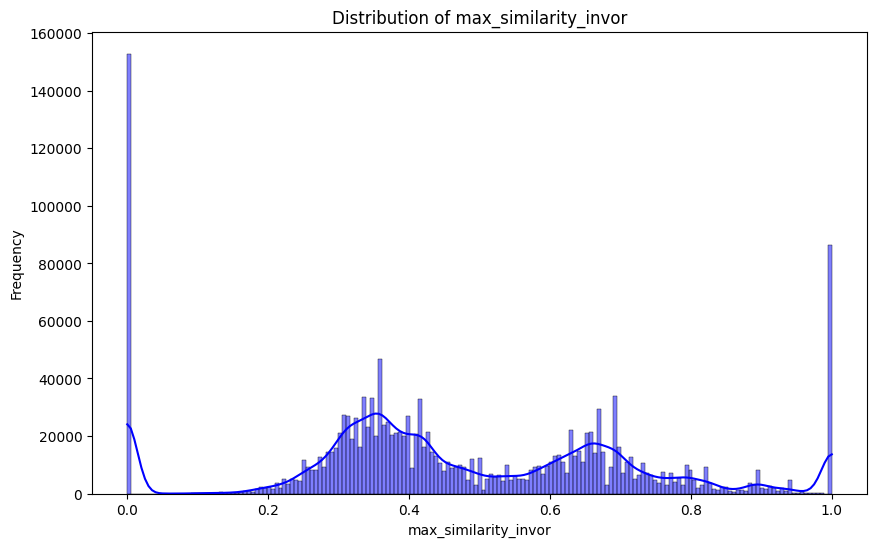

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(final_df['max_similarity_eeAssignee'], kde=True, color='blue')  # KDE曲线用于估计概率密度函数
plt.title('Distribution of max_similarity_invor')
plt.xlabel('max_similarity_invor')
plt.ylabel('Frequency')
plt.show()


In [61]:
# 计算大于0.80的样本数量
count_above_80 = (final_df['max_similarity_eeAssignee'] > 0.80).sum()
# 计算总样本数量
total_samples = final_df.shape[0]
# 计算大于0.80的样本占总样本的百分比
percentage_above_80 = (count_above_80 / total_samples) * 100
# 打印结果
print("Number of samples with 'max_similarity_eeAssignee' greater than 0.80:", count_above_80)
print("Percentage of total samples:", percentage_above_80, "%")


Number of samples with 'max_similarity_eeAssignee' greater than 0.80: 160049
Percentage of total samples: 9.733049458552031 %
